In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# load the data 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# reshape the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [7]:
# build a model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


C:\Users\ATHARVA\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(x_train, to_categorical(y_train), epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.7296 - loss: 2.9896 - val_accuracy: 0.8612 - val_loss: 0.4024
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8749 - loss: 0.3515 - val_accuracy: 0.8864 - val_loss: 0.3341
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.8990 - loss: 0.2785 - val_accuracy: 0.8888 - val_loss: 0.3196
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9107 - loss: 0.2427 - val_accuracy: 0.8893 - val_loss: 0.3222
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9198 - loss: 0.2240 - val_accuracy: 0.8921 - val_loss: 0.3105
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9253 - loss: 0.2097 - val_accuracy: 0.8911 - val_loss: 0.3465
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9298 - loss: 0.1931 - val_accuracy: 0.8945 - val_loss: 0.3414
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9333 -

In [25]:

# evaluate the model
loss, acc = model.evaluate(x_test, to_categorical(y_test))
print(f'loss: {loss}, acc: {acc}')
# make a prediction
yhat = model.predict(x_test)
print(f'Predicted: {np.argmax(yhat[0])}, Expected: {y_test[0]}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8880 - loss: 0.4554
loss: 0.4423186182975769, acc: 0.8884000182151794
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Predicted: 9, Expected: 9


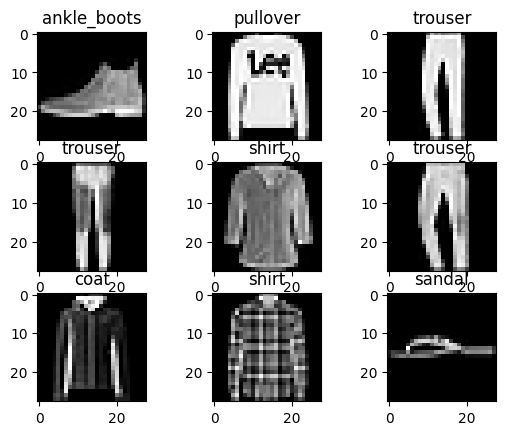

In [29]:
# plot the first 9 images
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i], cmap=plt.get_cmap('gray'), label=y_test[i])
    # show the label
    plt.title(labels[y_test[i]])
plt.show()
